In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import tensorflow as tf
import keras_tuner as kt

from sklearn.metrics import classification_report, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
X = np.load('binary_alpha_digits_images.npy')
y = np.load('binary_alpha_digits_labels.npy')

In [3]:
X.shape, y.shape

((1404, 20, 16), (1404,))

In [4]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

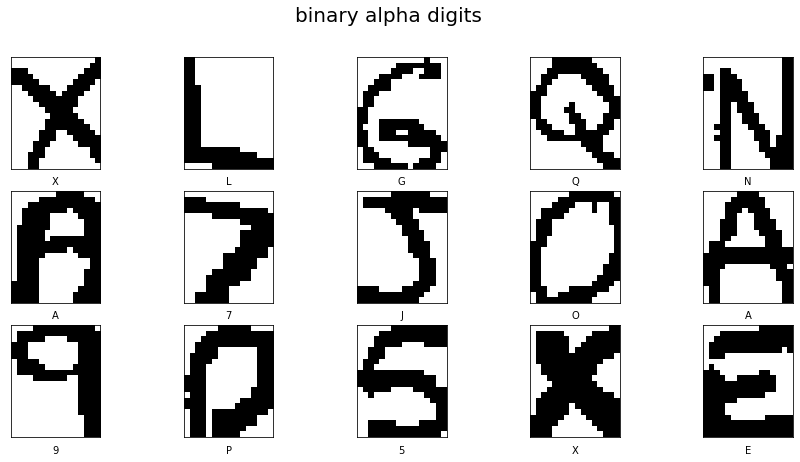

In [5]:
fig, axes = plt.subplots(3, 5, figsize=(15, 7))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y[n]])
    n += 1

In [6]:
print(X.shape, len(y), y, sep='\n')

(1404, 20, 16)
1404
[33 21 16 ...  5 23 15]


In [8]:
X = X / 255.0

In [9]:
# Dividing data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [351]:
# Create a model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(960, activation='relu'),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [352]:
# Train the model
hstr = model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
30/30 [==============================] - 0s 5ms/step - loss: 3.5797 - accuracy: 0.0447
Epoch 2/200
30/30 [==============================] - 0s 5ms/step - loss: 3.5400 - accuracy: 0.0809
Epoch 3/200
30/30 [==============================] - 0s 5ms/step - loss: 3.3921 - accuracy: 0.1330
Epoch 4/200
30/30 [==============================] - 0s 5ms/step - loss: 3.0218 - accuracy: 0.1947
Epoch 5/200
30/30 [==============================] - 0s 5ms/step - loss: 2.5644 - accuracy: 0.2638
Epoch 6/200
30/30 [==============================] - 0s 5ms/step - loss: 2.2520 - accuracy: 0.3234
Epoch 7/200
30/30 [==============================] - 0s 5ms/step - loss: 1.9957 - accuracy: 0.4457
Epoch 8/200
30/30 [==============================] - 0s 5ms/step - loss: 1.8358 - accuracy: 0.4298
Epoch 9/200
30/30 [==============================] - 0s 6ms/step - loss: 1.7033 - accuracy: 0.5032
Epoch 10/200
30/30 [==============================] - 0s 6ms/step - loss: 1.5853 - accuracy: 0.5266
Epoch 11/

30/30 [==============================] - 0s 5ms/step - loss: 0.0621 - accuracy: 0.9713
Epoch 163/200
30/30 [==============================] - 0s 6ms/step - loss: 0.0566 - accuracy: 0.9755
Epoch 164/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0557 - accuracy: 0.9798
Epoch 165/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0559 - accuracy: 0.9702
Epoch 166/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0545 - accuracy: 0.9766
Epoch 167/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0541 - accuracy: 0.9766
Epoch 168/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0569 - accuracy: 0.9723
Epoch 169/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0566 - accuracy: 0.9798
Epoch 170/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0613 - accuracy: 0.9745
Epoch 171/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0568 - accuracy: 0.9745
Epoc

In [58]:
y_test

array([13, 28,  4, 10, 31, 24, 16, 21, 31,  2,  9,  5,  7,  9, 30, 26,  2,
        5,  7, 13, 15, 16, 17, 13,  5, 16, 12, 16, 28,  3, 20, 35, 18, 32,
        8, 35,  4, 25,  8,  4, 22, 18, 11, 22, 25,  6,  7, 35, 31, 30, 16,
       19,  3, 17, 25, 25, 17,  7, 16, 19,  3,  1, 30, 11,  1, 33,  6, 12,
       10, 29, 24, 26, 27, 15, 22, 18, 19,  4, 24, 16, 17,  3,  8, 19, 14,
       31, 19, 27, 21, 12, 30, 17, 32, 19, 29, 32, 17, 23, 12, 31, 27, 28,
        7, 28, 29, 18,  9,  6, 17,  7, 26, 13, 23, 32, 32,  0, 17, 27,  3,
       25, 23, 18, 23, 12, 34, 13,  8,  1,  0, 22, 10, 29, 11, 18, 13, 34,
       12,  8, 28, 14, 35, 33, 29, 32, 16, 14, 20,  4, 26,  6, 20, 12, 24,
       19,  7, 13, 18,  0, 24, 30, 18, 14,  1,  4, 20, 33,  2,  9, 12,  3,
       18,  5, 32,  1, 11, 14, 17, 26, 32, 35,  4,  4,  7, 32, 27,  8, 18,
       34, 10, 17, 29, 19, 31, 24, 15, 18, 29, 26,  5, 17, 15, 19, 12,  1,
        9, 19,  9, 18, 22, 27, 29, 33, 12,  4, 30,  8,  5,  0, 30, 24, 32,
        4, 14, 26, 15, 19

In [353]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

In [354]:
print(predictions[0],
      np.argmax(predictions[0]),
      y_test[0],
      sep='\n')

[2.18697032e-03 4.26555587e-19 1.74892542e-19 6.21489107e-22
 4.69197730e-08 1.38803074e-23 2.48456163e-05 1.35366106e-14
 8.78638327e-17 1.28856700e-14 6.46219961e-03 6.62348248e-05
 6.58847217e-13 1.98940933e-02 1.38106261e-18 4.90421180e-13
 1.49366069e-05 1.94653035e-06 6.49472232e-20 3.40892759e-27
 1.29540781e-14 3.70662799e-20 7.38193194e-06 1.38949305e-08
 3.40788695e-03 9.67930555e-01 1.35184820e-07 1.30995359e-09
 6.60022278e-27 4.16191748e-18 2.82338283e-06 1.57977320e-14
 1.55947269e-10 3.75354859e-31 9.97262873e-23 4.38125622e-21]
25
13


### The model made a mistake in the letter "D", mistaking it for the letter "P". Let's look at the letters "P" from the training dataset.

####  y_test[0] has the form

In [374]:
classes[y_test[0]]

'D'

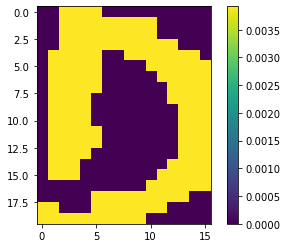

In [359]:
plt.figure()
plt.imshow(X_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

####  predictions[0] has the form

In [361]:
classes[np.argmax(predictions[0])]

'P'

In [364]:
print([i for i in range(len(X_train)) if y_train[i] == 25])

[34, 51, 56, 86, 88, 98, 189, 206, 226, 231, 356, 357, 360, 419, 448, 454, 500, 501, 596, 604, 648, 677, 683, 704, 711, 742, 773, 817, 822, 876, 930]


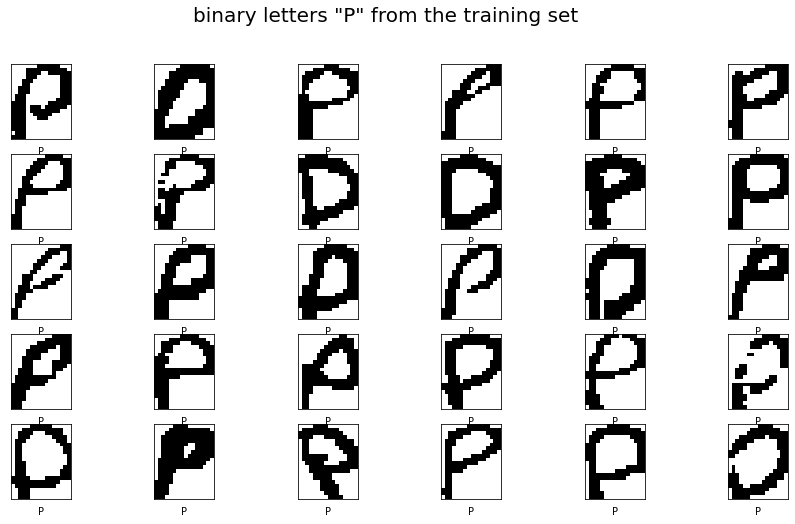

In [373]:
fig, axes = plt.subplots(5, 6, figsize=(15, 8))
fig.suptitle('binary letters "P" from the training set', fontsize=20)
n = [34, 51, 56, 86, 88, 98, 189, 206, 226, 231, 356, 357, 360, 419, 448, 454, 500,
     501, 596, 604, 648, 677, 683, 704, 711, 742, 773, 817, 822, 876]
i = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X_train[n[i]], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y_train[n[i]]])
    i += 1

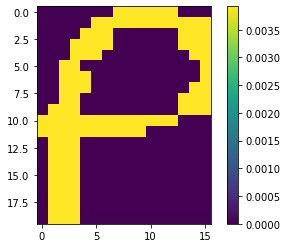

In [369]:
plt.figure()
plt.imshow(X_train[88])
plt.colorbar()
plt.grid(False)
plt.show()

In [355]:
# Evaluate the model.
model.evaluate(
  X_test,
  y_test
)

15/15 [==============================] - 0s 2ms/step - loss: 2.4385 - accuracy: 0.6659


[2.438476800918579, 0.6659482717514038]

In [356]:
np.argmax(predictions, axis=1)

array([25,  5,  4, 32, 31,  0, 26, 21, 31,  2,  7, 12,  7, 26, 30, 26,  2,
       28,  7,  0, 20, 15, 17, 13,  5, 26, 12, 11, 19,  3, 20, 13,  2, 32,
        8, 35,  4, 25,  5,  6, 22, 18,  3, 22, 25,  6,  7, 35, 31, 30, 16,
       19,  3, 17, 25, 10, 22,  7, 16,  5, 28,  1, 32, 11,  1,  8, 32, 12,
       20, 12,  0, 26,  8, 12, 23, 19, 19,  4,  0, 16, 17,  3,  8, 19, 14,
       31, 29, 27, 21, 12, 30,  4, 33, 19, 29, 32, 22, 23, 12, 31, 10,  3,
       13,  3, 29, 18, 15,  6, 17,  7,  4, 13, 22, 32, 32, 24, 25, 14,  3,
       25, 32,  1, 32, 12, 34,  2, 16,  1, 24, 10, 10, 12,  6,  7, 13, 34,
       12, 35, 28, 14, 35, 33, 29, 31, 16, 14, 33,  4, 26,  6, 20, 12,  0,
       19,  7, 13, 18,  0,  0, 31, 18, 14,  1, 20,  4, 33,  2,  7, 12, 35,
       19,  5, 32,  1, 11, 29, 17, 26, 32, 35,  4,  4,  7, 32, 27,  8, 35,
       33, 10, 17, 29, 13, 31,  0, 15, 18, 20, 26,  5, 17, 15, 13, 12,  1,
        9,  3,  9,  2, 10, 27, 29, 20, 12, 10, 13, 27, 19, 24, 30,  0, 32,
        4, 14, 26, 15, 19

In [357]:
print(classification_report(y_test, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.25      0.23      0.24        13
           1       0.65      0.92      0.76        12
           2       0.43      0.75      0.55         8
           3       0.67      0.83      0.74        12
           4       0.63      0.80      0.71        15
           5       0.73      0.73      0.73        15
           6       0.46      0.75      0.57         8
           7       0.77      0.91      0.83        11
           8       0.50      0.50      0.50        10
           9       0.92      0.61      0.73        18
          10       0.50      0.71      0.59        14
          11       0.88      0.58      0.70        12
          12       0.80      1.00      0.89        16
          13       0.47      0.73      0.57        11
          14       0.88      0.93      0.90        15
          15       0.69      0.79      0.73        14
          16       0.70      0.41      0.52        17
          17       0.85    

In [358]:
print(multilabel_confusion_matrix(y_test, np.argmax(predictions, axis=1)))

[[[442   9]
  [ 10   3]]

 [[446   6]
  [  1  11]]

 [[448   8]
  [  2   6]]

 [[447   5]
  [  2  10]]

 [[442   7]
  [  3  12]]

 [[445   4]
  [  4  11]]

 [[449   7]
  [  2   6]]

 [[450   3]
  [  1  10]]

 [[449   5]
  [  5   5]]

 [[445   1]
  [  7  11]]

 [[440  10]
  [  4  10]]

 [[451   1]
  [  5   7]]

 [[444   4]
  [  0  16]]

 [[444   9]
  [  3   8]]

 [[447   2]
  [  1  14]]

 [[445   5]
  [  3  11]]

 [[444   3]
  [ 10   7]]

 [[443   2]
  [  8  11]]

 [[447   1]
  [  8   8]]

 [[441   4]
  [  6  13]]

 [[446   7]
  [  4   7]]

 [[453   1]
  [  4   6]]

 [[447   4]
  [  4   9]]

 [[449   2]
  [  7   6]]

 [[446  10]
  [  8   0]]

 [[452   4]
  [  1   7]]

 [[444   5]
  [  3  12]]

 [[450   2]
  [  6   6]]

 [[448   2]
  [  8   6]]

 [[448   4]
  [  4   8]]

 [[452   2]
  [  3   7]]

 [[449   2]
  [  4   9]]

 [[443   5]
  [  2  14]]

 [[447   5]
  [  5   7]]

 [[453   0]
  [  3   8]]

 [[449   4]
  [  4   7]]]


---

### Find optimal hyperparameter values using kerasTuner

In [319]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(20, 16)))

    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(36, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-0, 1e-1, 1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [320]:
tuner = kt.Hyperband(build_model,
                     objective='accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='my_dir9',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir9\intro_to_kt\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir9\intro_to_kt\tuner0.json


In [321]:
# %%time
tuner.search(X_train, y_train)

models = tuner.get_best_models(num_models=2)

tuner.results_summary()

INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir9\intro_to_kt
Showing 10 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
units: 256
learning_rate: 0.01
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 5b985e81d9a9137cb9e105561bdaeb5d
Score: 0.7478723526000977
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.01
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: e5cb77c81872922d0777b678a15827fb
Score: 0.6776595711708069
Trial summary
Hyperparameters:
units: 384
learning_rate: 0.001
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.5755318999290466
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.01
tuner/epochs: 7
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.5691489577293396
Trial summary
Hyperparameters:
units: 256
learning_rate: 0.01
tuner/epochs: 7
tuner/initial_epoch: 3
tuner/bra

In [322]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 256 and the optimal learning rate for the optimizer
is 0.01.



In [323]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
24/24 [==============================] - 0s 9ms/step - loss: 3.5815 - accuracy: 0.0559 - val_loss: 3.5557 - val_accuracy: 0.1223
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 3.4779 - accuracy: 0.1689 - val_loss: 3.4282 - val_accuracy: 0.1383
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 3.2057 - accuracy: 0.1995 - val_loss: 3.1282 - val_accuracy: 0.1862
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 2.7770 - accuracy: 0.3364 - val_loss: 2.7260 - val_accuracy: 0.2872
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 2.3306 - accuracy: 0.4189 - val_loss: 2.3555 - val_accuracy: 0.3511
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 1.9674 - accuracy: 0.5040 - val_loss: 2.0701 - val_accuracy: 0.4362
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 1.6952 - accuracy: 0.5771 - val_loss: 1.9040 - val_accuracy: 0.4309
Epoch 8/50
24/24 [==

In [324]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 43


In [325]:
hypermodel = tuner.hypermodel.build(best_hps)

In [326]:
# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/43
24/24 [==============================] - 0s 8ms/step - loss: 3.5856 - accuracy: 0.0332 - val_loss: 3.5602 - val_accuracy: 0.0904
Epoch 2/43
24/24 [==============================] - 0s 2ms/step - loss: 3.4807 - accuracy: 0.1423 - val_loss: 3.4390 - val_accuracy: 0.1277
Epoch 3/43
24/24 [==============================] - 0s 2ms/step - loss: 3.1994 - accuracy: 0.2566 - val_loss: 3.1053 - val_accuracy: 0.2128
Epoch 4/43
24/24 [==============================] - 0s 2ms/step - loss: 2.7396 - accuracy: 0.3205 - val_loss: 2.6884 - val_accuracy: 0.2819
Epoch 5/43
24/24 [==============================] - 0s 2ms/step - loss: 2.2586 - accuracy: 0.4348 - val_loss: 2.3149 - val_accuracy: 0.3617
Epoch 6/43
24/24 [==============================] - 0s 2ms/step - loss: 1.9054 - accuracy: 0.5040 - val_loss: 2.0489 - val_accuracy: 0.4096
Epoch 7/43
24/24 [==============================] - 0s 2ms/step - loss: 1.6352 - accuracy: 0.5745 - val_loss: 1.8206 - val_accuracy: 0.5000
Epoch 8/43
24/24 [==

In [327]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

15/15 [==============================] - 0s 999us/step - loss: 1.1585 - accuracy: 0.6724
[test loss, test accuracy]: [1.1585049629211426, 0.6724137663841248]


In [328]:
# Predict 
predictions = hypermodel.predict(X_test)

In [329]:
np.argmax(predictions, axis=1)

array([13,  5,  4, 32, 31, 24, 16, 21, 31,  2, 13, 12,  7, 26, 30, 26,  2,
       28,  7, 24, 20, 16, 17, 13,  5, 26, 12, 13, 19,  3, 20,  2,  2, 32,
        8, 35,  4, 25,  8,  4, 22,  2, 28, 22, 25,  6,  7, 35, 34, 30, 16,
       35,  3, 17, 25, 10, 17,  7, 26,  5, 28,  1, 32, 11,  1, 34,  6, 12,
       20, 15, 24, 26,  1, 13, 10, 19, 19,  4, 24, 16, 17,  3, 16, 19, 14,
       31, 29, 27, 21, 12, 13,  4, 34, 19, 29, 32, 22, 23, 12, 31, 27, 28,
       13,  3, 29,  2, 26,  6, 17,  7, 26, 13, 23, 32, 17, 24, 22, 14,  3,
       25, 32,  1, 32, 12, 34,  2, 16,  1, 24, 10, 11, 15,  6,  7, 13, 34,
       12,  1, 28, 14, 35, 20, 29, 32, 16, 14, 32,  4, 26,  6, 20, 12, 24,
       19,  7, 13,  2, 24, 24, 31, 18, 14,  1, 20,  4, 33,  2, 34, 12,  3,
       19,  5,  4,  1, 11, 15, 22, 16, 32,  2,  4,  4,  7, 32, 27, 33,  2,
       33, 10, 17, 29, 13, 31, 24, 15, 35,  1, 26,  5, 17, 15, 13, 12,  1,
        9,  3,  9,  2, 22, 27, 29, 20, 12, 10, 13, 20, 19, 24, 30, 24, 23,
        4, 16, 26, 15, 19

In [330]:
print(classification_report(y_test, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.61      0.92      0.73        12
           2       0.26      0.62      0.37         8
           3       0.75      0.75      0.75        12
           4       0.68      0.87      0.76        15
           5       0.85      0.73      0.79        15
           6       0.80      1.00      0.89         8
           7       0.91      0.91      0.91        11
           8       1.00      0.40      0.57        10
           9       0.87      0.72      0.79        18
          10       0.59      0.71      0.65        14
          11       0.70      0.58      0.64        12
          12       0.94      1.00      0.97        16
          13       0.43      0.82      0.56        11
          14       0.86      0.80      0.83        15
          15       0.59      0.71      0.65        14
          16       0.64      0.53      0.58        17
          17       0.75    

C:\Users\marko\anaconda3\envs\TensorFlowEnv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marko\anaconda3\envs\TensorFlowEnv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marko\anaconda3\envs\TensorFlowEnv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [331]:
print(multilabel_confusion_matrix(y_test, np.argmax(predictions, axis=1)))

[[[451   0]
  [ 13   0]]

 [[445   7]
  [  1  11]]

 [[442  14]
  [  3   5]]

 [[449   3]
  [  3   9]]

 [[443   6]
  [  2  13]]

 [[447   2]
  [  4  11]]

 [[454   2]
  [  0   8]]

 [[452   1]
  [  1  10]]

 [[454   0]
  [  6   4]]

 [[444   2]
  [  5  13]]

 [[443   7]
  [  4  10]]

 [[449   3]
  [  5   7]]

 [[447   1]
  [  0  16]]

 [[441  12]
  [  2   9]]

 [[447   2]
  [  3  12]]

 [[443   7]
  [  4  10]]

 [[442   5]
  [  8   9]]

 [[441   4]
  [  7  12]]

 [[446   2]
  [ 11   5]]

 [[440   5]
  [  7  12]]

 [[444   9]
  [  4   7]]

 [[453   1]
  [  2   8]]

 [[448   3]
  [  3  10]]

 [[450   1]
  [  6   7]]

 [[440  16]
  [  0   8]]

 [[455   1]
  [  1   7]]

 [[443   6]
  [  3  12]]

 [[451   1]
  [  6   6]]

 [[445   5]
  [  5   9]]

 [[450   2]
  [  4   8]]

 [[450   4]
  [  4   6]]

 [[450   1]
  [  5   8]]

 [[442   6]
  [  5  11]]

 [[449   3]
  [  6   6]]

 [[448   5]
  [  3   8]]

 [[450   3]
  [  6   5]]]


### the model does not find zeros. Let's look at the training dataset for zeros and the letter O.

In [156]:
classes[24]

'O'

In [376]:
print([i for i in range(len(X_train)) if y_train[i] == 24])

[8, 22, 90, 102, 187, 193, 221, 238, 257, 264, 269, 295, 311, 333, 365, 389, 390, 403, 412, 576, 659, 663, 676, 690, 714, 718, 775, 779, 835, 845, 922]


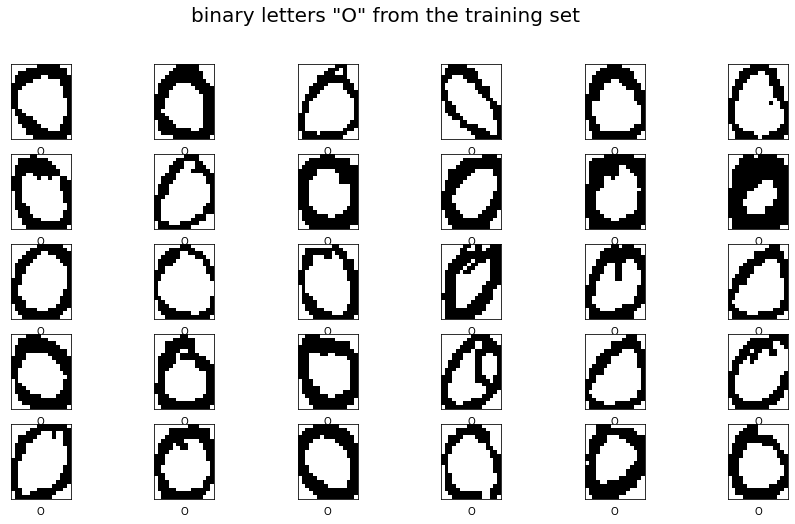

In [382]:
fig, axes = plt.subplots(5, 6, figsize=(15, 8))
fig.suptitle('binary letters "O" from the training set', fontsize=20)
n = [8, 22, 90, 102, 187, 193, 221, 238, 257, 264, 269, 295, 311, 333, 365,
     389, 390, 403, 412, 576, 659, 663, 676, 690, 714, 718, 775, 779, 835, 845]
i = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X_train[n[i]], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y_train[n[i]]])
    i += 1

In [378]:
classes[0]

'0'

In [380]:
print([i for i in range(len(X_train)) if y_train[i] == 0])

[53, 95, 121, 246, 293, 308, 359, 386, 392, 396, 397, 423, 426, 485, 531, 595, 638, 640, 647, 665, 673, 721, 729, 737, 878, 892]


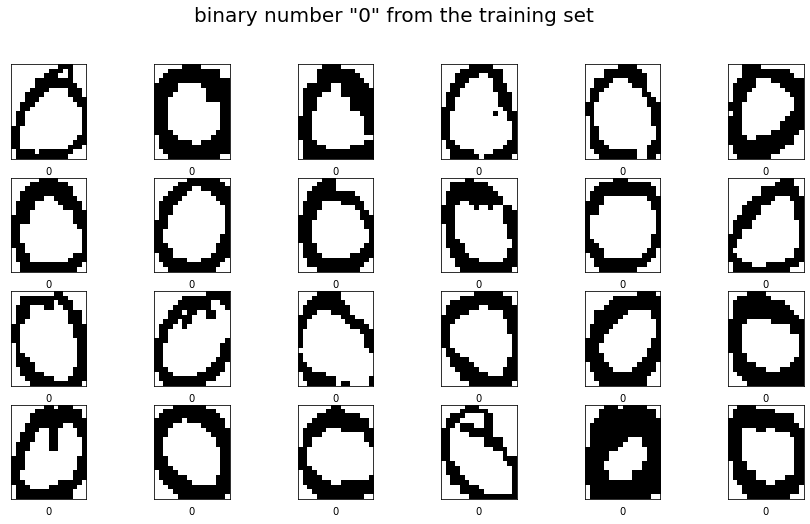

In [383]:
fig, axes = plt.subplots(4, 6, figsize=(15, 8))
fig.suptitle('binary number "0" from the training set', fontsize=20)
n = [53, 95, 121, 246, 293, 308, 359, 386, 392, 396, 397, 423, 426, 485, 531, 595, 638, 640, 647, 665, 673, 721, 729, 737]
i = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X_train[n[i]], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y_train[n[i]]])
    i += 1

### Differences cannot be distinguished, but the model, under certain hyperparameters, is able to distinguish between these two positions, albeit with small values of precision/recall.

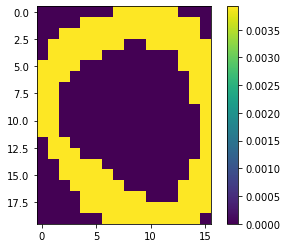

In [158]:
plt.figure()
plt.imshow(X_train[8])
plt.colorbar()
plt.grid(False)
plt.show()

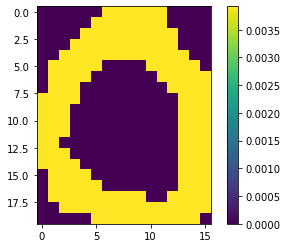

In [159]:
plt.figure()
plt.imshow(X_train[22])
plt.colorbar()
plt.grid(False)
plt.show()

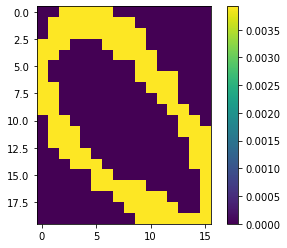

In [160]:
plt.figure()
plt.imshow(X_train[102])
plt.colorbar()
plt.grid(False)
plt.show()